# **쇼핑몰 주문 데이터 분석 - 매출 분석**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/OnlineRetail2.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceHour,InvoiceWeekday,InvoiceDay,InvoiceMonth,InvoiceYear,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,Wednesday,1,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,Wednesday,1,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,Wednesday,1,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,Wednesday,1,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,Wednesday,1,12,2010,20.34


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       397884 non-null  int64  
 1   StockCode       397884 non-null  object 
 2   Description     397884 non-null  object 
 3   Quantity        397884 non-null  int64  
 4   InvoiceDate     397884 non-null  object 
 5   UnitPrice       397884 non-null  float64
 6   CustomerID      397884 non-null  int64  
 7   Country         397884 non-null  object 
 8   InvoiceHour     397884 non-null  int64  
 9   InvoiceWeekday  397884 non-null  object 
 10  InvoiceDay      397884 non-null  int64  
 11  InvoiceMonth    397884 non-null  int64  
 12  InvoiceYear     397884 non-null  int64  
 13  Amount          397884 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 42.5+ MB


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

## **전체 매출 분석**

In [5]:
## 전체 매출
total_monetary = data['Amount'].sum()
total_monetary

8911407.904

## **월별 매출 분석**

In [6]:
data['InvoiceYM'] = data['InvoiceDate'].dt.strftime('%Y%m')

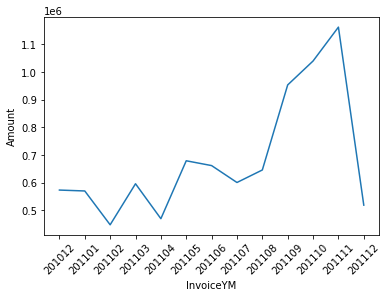

In [7]:
## 매출 추이
group = data.groupby(['InvoiceYM'], as_index=False)['Amount'].sum()
ax = sns.lineplot(x = 'InvoiceYM', y = 'Amount', data = group)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

- 2011년 9, 10, 11월에 매출이 급격히 늘어난 후 12월에 급격히 줄었다.

In [8]:
data[["InvoiceYear", "InvoiceMonth", "InvoiceDay"]].drop_duplicates().sort_values(by=["InvoiceYear", "InvoiceMonth", "InvoiceDay"])

,InvoiceYear,InvoiceMonth,InvoiceDay
0,2010,12,1
1942,2010,12,2
3942,2010,12,3
5045,2010,12,5
7752,2010,12,6
...,...,...,...
386640,2011,12,5
390014,2011,12,6
392568,2011,12,7
394735,2011,12,8


- 2011년 12월 데이터가 9일까지밖에 존재하지 않기 때문에 급격히 줄어든것처럼 보인 것이였다.

## **일별 매출 추이 분석**

In [9]:
data['InvoiceYMD'] = data['InvoiceDate'].dt.strftime('%Y%m%d')

In [ ]:
## 매출 추이
group = data.groupby(['InvoiceYMD'], as_index=False)['Amount'].sum().sort_values(by=['InvoiceYMD'])
ax = sns.lineplot(x = 'InvoiceYMD', y = 'Amount', data = group)
plt.show()

In [ ]:
group

- 실제로 일별 매출 추이 확인 결과 매출은 점점 증가하는 추세를 보인다.

## **시간대별 매출 분석**

In [ ]:
hour_monetary = data.groupby(['InvoiceHour']).agg({'Amount':'sum'}).sort_values('Amount', ascending=False).reset_index()
hour_monetary

In [ ]:
ax = sns.barplot(x = 'InvoiceHour', y = 'Amount', data = hour_monetary)
plt.show()

- 10~13시 사이에 많은 주문이 일어나며 특히 12시에 가장 많은 주문이 발생한다.
- 21 ~ 6시 사이에는 주문이 발생하지 않는다.
- 15시 이후 주문량이 급락한다.

## **요일별 매출 분석**

In [ ]:
day_monetary = data.groupby(['InvoiceWeekday']).agg({'Amount':'sum'}).sort_values('Amount', ascending=False).reset_index()
day_monetary

In [ ]:
ax = sns.barplot(x = 'InvoiceWeekday', y = 'Amount', data = day_monetary)
plt.show()

- 특이하게도 토요일에는 매출이 존재하지 않는다.
- 화, 수, 목에 대부분의 매출이 발생하며, 목 > 화 > 수 > 금 > 월 > 일 순으로 매출이 많이 발생한다.

## **인기 상품 분석**

In [ ]:
len(data.StockCode.unique())

In [ ]:
stock_lst = data.drop_duplicates(['StockCode'])[['StockCode', 'Description', 'UnitPrice']]
stock_lst

In [ ]:
## 매출 상위 10개 상품 확인
pop_amt_stock = data.groupby(['StockCode']).agg({'Amount':'sum'}).sort_values('Amount', ascending=False).reset_index()
pd.merge(pop_amt_stock, stock_lst, on='StockCode').head(10)

In [ ]:
## 주문량 상위 10개 상품 확인
pop_qnty_stock = data.groupby(['StockCode']).agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False).reset_index()
pd.merge(pop_qnty_stock, stock_lst, on='StockCode').head(10)